In [1]:
import nibabel as nib
import numpy as np
import scipy as np
import matplotlib.pyplot as plt

In [2]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [3]:
def f(M, i, j, k):
    """ Return X, Y, Z (world) coordinates for i, j, k """
    #return M.dot([i, j, k]) + abc
    return M.dot([i, j, k])

In [64]:
def coordinates_reference2CTmapping(ref_affine, CT_affine, Ci, Cj, Ck):
    """ Return X, Y, Z CT coordinates from reference segmentation coordinates Ci, Cj, Ck"""
    Reference_voxel2CT_voxel = npl.inv(CT_affine).dot(ref_affine)
    [X, Y, Z] = apply_affine(Reference_voxel2CT_voxel, [Ci, Cj, Ck])
    return X, Y, Z

In [98]:
def volume_reference2CTmapping(reference_segmentation, CT_volume):
    """ Returns a new CT volume where the structure from the reference segmentation are colored"""
    data_reference = reference_segmentation.get_fdata()
    data_CT_volume = CT_volume.get_fdata()
    maxIntensity = np.amax(data_CT_volume)
    
    nonegative_subs = np.where(data_reference>0)
    for i in range(len(nonegative_subs[0])):
        [X, Y, Z] = coordinates_reference2CTmapping(reference_segmentation.affine, CT_volume.affine, nonegative_subs[0][i], nonegative_subs[1][i], nonegative_subs[2][i])
        data_CT_volume[int(X), int(Y), int(Z)] = maxIntensity
    
    return data_CT_volume

In [5]:
img = nib.load('750_L/image.nii')

In [6]:
data=img.get_fdata()
data.shape

(625, 805, 692)

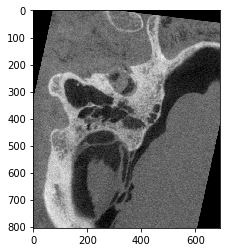

In [7]:
imgplot = plt.imshow(data[250,:,:], cmap='gray')

In [8]:
slice_0 = data[250, :, :]
slice_1 = data[:, 250, :]
slice_2 = data[:, :, 250]

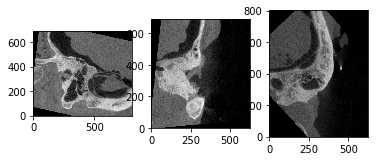

In [9]:
show_slices([slice_0, slice_1, slice_2])

In [10]:
img_Canal = nib.load('750_L/External Auditory Canal.nii')
data_Canal = img_Canal.get_fdata()
print(data_Canal.shape)

(95, 75, 93)


In [11]:
M = img_Canal.affine[:3, :3]
#abc = data_Canal.affine[:3, 3]
M
#abc
print(img_Canal.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 95 75 93  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.  0.1 0.1 0.1 0.  0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : -15.01848
qoffset_y       : -24.605656
qoffset_z       : 30.465618
srow_x          : [0. 0. 0. 0.]
srow_y

In [12]:
f(M, 1, 2, 1)

array([-0.1, -0.2,  0.1])

In [13]:
from nibabel.affines import apply_affine
apply_affine(img_Canal.affine, [0, 0, 0])

array([-15.0184803 , -24.60565567,  30.46561813])

In [14]:
import numpy.linalg as npl
Canal_voxel2CT_voxel = npl.inv(img.affine).dot(img_Canal.affine)

In [15]:
apply_affine(Canal_voxel2CT_voxel, [0, 0, 0])

array([150.18480077, 246.05655304, 304.66083009])

In [61]:
[X, Y, Z] = apply_affine(Canal_voxel2CT_voxel, [50, 11, 2])

In [63]:
print(int(X))
print(round(Y))
print(round(Z))

200
257.0
307.0


In [90]:
X2, Y2, Z2= reference2CTmapping(img_Canal.affine, img.affine, ind1[0][0], ind1[1][0], ind1[2][0])

In [91]:
print(X2)
print(Y2)
print(Z2)

150.0
271.0
321.0


In [92]:
data[150, 271, 321]

10000.0

In [39]:
ind1 = np.where(data_Canal>0)
ind1

(array([ 0,  0,  0, ..., 94, 94, 94]),
 array([25, 25, 26, ..., 56, 57, 57]),
 array([16, 17, 14, ..., 73, 71, 72]))

In [114]:
X2, Y2, Z2= reference2CTmapping(img_Canal.affine, img.affine, 94, 57, 72)

In [116]:
print(X2)
print(Y2)
print(Z2)

244.0
303.0
377.0


In [80]:
np.amax(img.get_fdata())

7190.0

In [100]:
new_CT_volume = volume_reference2CTmapping(img_Canal, img)

In [101]:
data[int(0), int(0.0), int(0.0)]

-1000.0

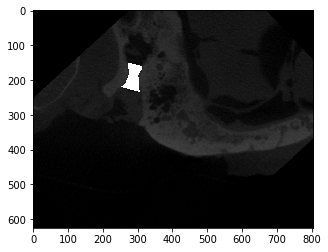

In [102]:
imgplot = plt.imshow(data[:,:,321], cmap='gray')


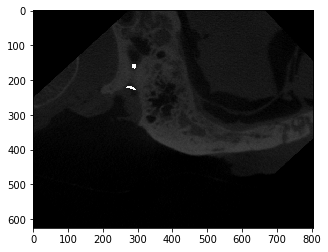

In [156]:
imgplot = plt.imshow(new_CT_volume[:,:,310], cmap='gray')

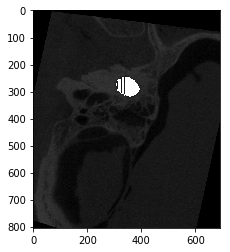

In [240]:
imgplot = plt.imshow(new_CT_volume[220,:,:], cmap='gray')

In [241]:
slice_a = new_CT_volume[:, :, 321]
slice_b = new_CT_volume[:, :, 312]
slice_c = new_CT_volume[220, :, :]

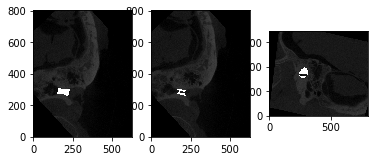

In [242]:
show_slices([slice_a, slice_b, slice_c])